In [2]:
import sys
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

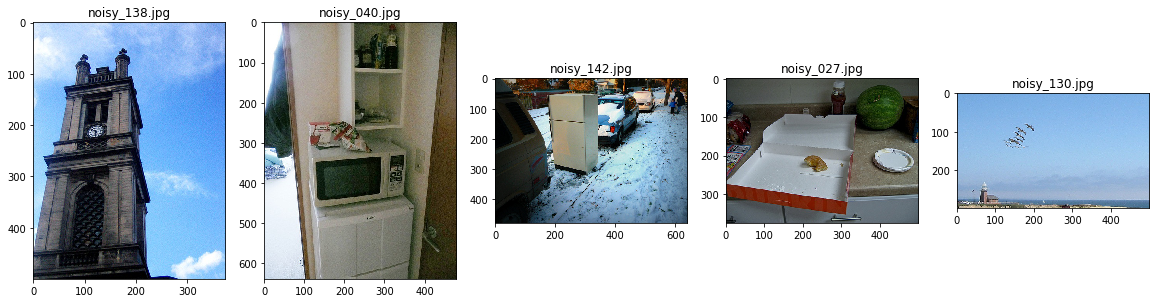

In [3]:
plt.figure(figsize=(20,20))

test_folder=r'../noisy-data/Photo'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [22]:
IMG_WIDTH=256
IMG_HEIGHT=256
BATCH_SIZE=30
img_folder=r'../noisy-data/'

In [18]:
ds=tf.keras.utils.image_dataset_from_directory(
    img_folder,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMG_WIDTH,IMG_HEIGHT),
    shuffle=True,
    seed=42,
    #validation_split=0,
    #subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 1 classes.


In [19]:
class_names =  ds.class_names
print(class_names)

['Photo']


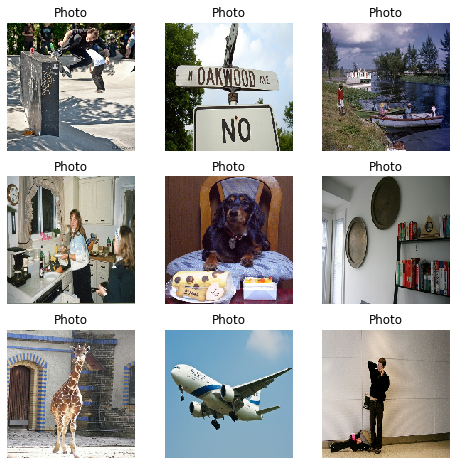

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [21]:
#images, labels = next(iter(ds))
#print(images.shape)
#print(labels.shape)

(30, 180, 180, 3)
(30,)
